**Deskripsi Tujuan Bisnis**
1. Dengan adanya data ini user dapat mengetahui memiliki nilai gizinya masing-masing pada setiap jenis cereal
2. Mengetahui rating setiap nama cereal
3. Mengetahui supplier dari cereal tersebut

**Analisis Pendekatan**

Dalam analisis ini peneliti menggunakan metode EDA (Exploratory Data Analysis). EDA merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Urutan langkah-langkap dengan metode EDA sebagai berikut: 
Masalah-> Data-> Analisis-> Model-> Kesimpulan 

**Pengumpulan Data**

Dalam tahap pengumpulan data disini menggunakan dataset yang diambil dari kaggle.com yang  berjudul Cereals oleh Johar M.Ashfaque

**Pemahaman Data**

Dataset yang berjudul Cereal ini berisikan data berbagai jenis cereal yang umum itu memiliki nilai gizinya masing-masing setiap takarannya dan memiliki banyak nama cerealnya. Terdapat kolom yang berisikan Cereal, supplier, cara menyeduh, nilai gizi yaitu calories,protein,	fat,	sodium,	fiber,	carbo,	sugars,	potass,	vitamins,	dan rating setiap nama cerealnya.


**Eksplorasi Data**

* **Mempersiap Data**

Disini peneliti menggunakan libbrary "pandas", "numpy", "seaborn"

In [2]:
import pandas as pd
import os 
os.listdir ('sample_data')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import numpy as np
import re # import library for regular expression
import random # library for random number generation

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/AnandaPricilliaa/ProyekDataset/master/Cereals.csv')
print("read dataset in dataframe!")

read dataset in dataframe!


* **Menampilkan Data**

Berikut ini merupakan tabel dari dataset yang akan digunakan.

In [7]:
df.head()

,Cereal name,Supplier,Cold or Hot,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,34.384843


* Melihat Dimensi Data

In [8]:
dimensi      = df.shape
panjang_data = len(df)
print(f'Dimensi data sebanyak {dimensi[0]} baris, dan {dimensi[1]} kolom')

Dimensi data sebanyak 77 baris, dan 13 kolom


* **Cek Missing Values**

In [9]:
df.isnull().sum()

Cereal name    0
Supplier       0
Cold or Hot    0
calories       0
protein        0
fat            0
sodium         0
fiber          0
carbo          1
sugars         1
potass         2
vitamins       0
rating         0
dtype: int64

Bedasarkan data yang diatas dataset ini memiliki nilai kosong atau *missing values* pada kolom carbo, sugars dan potass

* **Menghapus missing Values**

In [48]:
# Langkah 1
df_carbo = df
df_sugars = df
df_potass = df
# Langkah 2
modus = df_carbo['carbo'].mode()[0]
modus = df_sugars['sugars'].mode()[0]
modus = df_potass['potass'].mode()[0]
# Langkah 3
df_carbo['carbo'] = df_carbo['carbo'].fillna(modus)
df_sugars['sugars'] = df_carbo['sugars'].fillna(modus)
df_potass['potass'] = df_carbo['potass'].fillna(modus)
# Langkah 4
df_carbo['carbo'].isna().sum()
df_sugars['sugars'].isna().sum()
df_potass['potass'].isna().sum()



0

* **Cek Ulang Missing Values**

In [49]:
df.isnull().sum()

Cereal name    0
Supplier       0
Cold or Hot    0
calories       0
protein        0
fat            0
sodium         0
fiber          0
carbo          0
sugars         0
potass         0
vitamins       0
rating         0
dtype: int64

Berdasarkan data diatas data kosong sudah dihapus, sehingga data diatas sudah tidak ada nilai kosongnya 

**Pemodelan Data**

* **Melihat Frekuensi Data Berdasarkan Calories Tiap Cereal** 

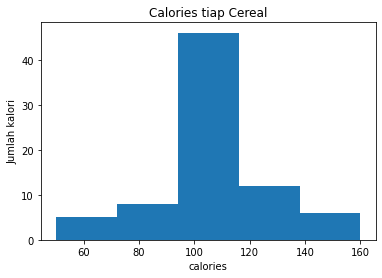

In [14]:
#Plots in matplotlib reside within a figure
fig=plt.figure()

ax = fig.add_subplot(1,1,1)

#variabel
ax.hist(df['calories'],bins = 5)

#Labels and Tit
plt.title('Calories tiap Cereal')
plt.xlabel('calories')
plt.ylabel('Jumlah kalori')
plt.show()

Berdasarkan Grafik diatas maka dapat dianalisa bahwa jumlah kalori pada cereal yang tertinggi adalah antara 100 sampai 120 


**Melihat keterkaitan hubungan data berdasarkan Kalori pada cereal menggunakan Scatter Plot**

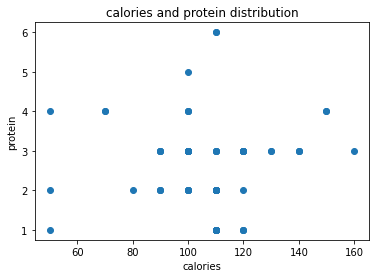

In [15]:
#Plots in matplotlib reside within a figureobject, use plt.figure to create new figure
fig=plt.figure()

#Create one or more subplots usingadd_subplot, because you can'tcreate blank figure
ax = fig.add_subplot(1,1,1)

#Variable
ax.scatter(df['calories'],df['protein'])

#Labels and Tit
plt.title('calories and protein distribution')
plt.xlabel('calories')
plt.ylabel('protein')
plt.show()

Berdasarkan Scatterplot diatas menunjukkan bahwa data yang dianalisa merupakan data normal.

- **Box-plot keterkaitan Rating terhadap Nama Cereal**

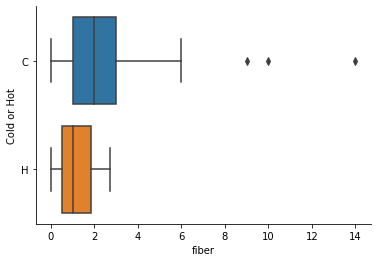

In [22]:
sns.boxplot(data=df, x='fiber', y='Cold or Hot')
sns.despine()
plt.show()

* **Tabel Frekuensi**

In [25]:
test= df.groupby(['Cereal name','Supplier'])
test.size()

Cereal name                Supplier
100%_Bran                  N           1
100%_Natural_Bran          Q           1
All-Bran                   K           1
All-Bran_with_Extra_Fiber  K           1
Almond_Delight             R           1
                                      ..
Triples                    G           1
Trix                       G           1
Wheat_Chex                 R           1
Wheaties                   G           1
Wheaties_Honey_Gold        G           1
Length: 77, dtype: int64

Tabel Frekuensi diatas digunakan untuk mengelompokkan Nama Cereal dan Supplier pada masing-masing Cereal. Sehingga dapat melihat Nama cereal beserta Suppliernya

* **Mengelompokkan Variabel**

In [26]:
test= df.groupby(['sugars'])
test.describe()

calories                                                            \
          count        mean        std    min    25%    50%    75%    max   
sugars                                                                      
0.0         7.0   72.857143  22.146697   50.0   50.0   80.0   90.0  100.0   
1.0         1.0  110.000000        NaN  110.0  110.0  110.0  110.0  110.0   
2.0         3.0  100.000000  10.000000   90.0   95.0  100.0  105.0  110.0   
3.0        13.0  106.153846   5.063697  100.0  100.0  110.0  110.0  110.0   
4.0         1.0  120.000000        NaN  120.0  120.0  120.0  120.0  120.0   
5.0         5.0   90.000000  12.247449   70.0   90.0   90.0  100.0  100.0   
6.0         7.0   94.285714  12.724180   70.0   90.0  100.0  100.0  110.0   
7.0         4.0  115.000000  17.320508  100.0  107.5  110.0  117.5  140.0   
8.0         5.0  114.000000  11.401754  100.0  110.0  110.0  120.0  130.0   
9.0         4.0  122.500000  12.583057  110.0  117.5  120.0  125.0  140.0   
10.0        5.0  114.000000  11.401754  100.0  110.0  110.0  120.0  130.0   
11.0        5.0  128.000000  20.493902  110.0  110.0  120.0  150.0  150.0   
12.0        7.0  114.285714   5.345225  110.0  110.0  110.0  120.0  120.0   
13.0        4.0  122.500000  25.000000  110.0  110.0  110.0  122.5  160.0   
14.0        3.0  123.333333  15.275252  110.0  115.0  120.0  130.0  140.0   
15.0        2.0  105.000000   7.071068  100.0  102.5  105.0  107.5  110.0   

       protein                                                 fat            \
         count      mean       std  min  25%  50%   75%  max count      mean   
sugars                                                                         
0.0        7.0  2.571429  0.975900  1.0  2.0  3.0  3.00  4.0   7.0  0.000000   
1.0        1.0  6.000000       NaN  6.0  6.0  6.0  6.00  6.0   1.0  2.000000   
2.0        3.0  2.000000  1.000000  1.0  1.5  2.0  2.50  3.0   3.0  0.000000   
3.0       13.0  2.846154  1.143544  2.0  2.0  3.0  3.00  6.0  13.0  0.538462   
4.0        1.0  3.000000       NaN  3.0  3.0  3.0  3.00  3.0   1.0  3.000000   
5.0        5.0  2.800000  0.836660  2.0  2.0  3.0  3.00  4.0   5.0  0.400000   
6.0        7.0  2.857143  1.069045  2.0  2.0  2.0  4.00  4.0   7.0  1.000000   
7.0        4.0  3.000000  0.000000  3.0  3.0  3.0  3.00  3.0   4.0  1.750000   
8.0        5.0  2.600000  0.547723  2.0  2.0  3.0  3.00  3.0   5.0  2.400000   
9.0        4.0  1.750000  0.957427  1.0  1.0  1.5  2.25  3.0   4.0  1.500000   
10.0       5.0  2.600000  0.547723  2.0  2.0  3.0  3.00  3.0   5.0  1.600000   
11.0       5.0  2.200000  1.643168  1.0  1.0  1.0  4.00  4.0   5.0  1.600000   
12.0       7.0  1.714286  0.951190  1.0  1.0  1.0  2.50  3.0   7.0  0.857143   
13.0       4.0  1.750000  0.957427  1.0  1.0  1.5  2.25  3.0   4.0  1.250000   
14.0       3.0  2.666667  0.577350  2.0  2.5  3.0  3.00  3.0   3.0  0.666667   
15.0       2.0  2.000000  0.000000  2.0  2.0  2.0  2.00  2.0   2.0  0.500000   

                                            sodium                         \
             std  min   25%  50%   75%  max  count        mean        std   
sugars                                                                      
0.0     0.000000  0.0  0.00  0.0  0.00  0.0    7.0   31.428571  56.399932   
1.0          NaN  2.0  2.00  2.0  2.00  2.0    1.0  290.000000        NaN   
2.0     0.000000  0.0  0.00  0.0  0.00  0.0    3.0  233.333333  60.277138   
3.0     0.518875  0.0  0.00  1.0  1.00  1.0   13.0  219.230769  78.151726   
4.0          NaN  3.0  3.00  3.0  3.00  3.0    1.0   75.000000        NaN   
5.0     0.547723  0.0  0.00  0.0  1.00  1.0    5.0  163.000000  93.246984   
6.0     0.577350  0.0  1.00  1.0  1.00  2.0    7.0  143.571429  71.455947   
7.0     1.258306  0.0  1.50  2.0  2.25  3.0    4.0  125.000000  91.469485   
8.0     1.516575  1.0  2.00  2.0  2.00  5.0    5.0  153.000000  81.975606   
9.0     1.000000  1.0  1.00  1.0  1.50  3.0    4.0  212.500000  47.871355   
10.0    0.547723  1.0

* **Corellation Mapping**

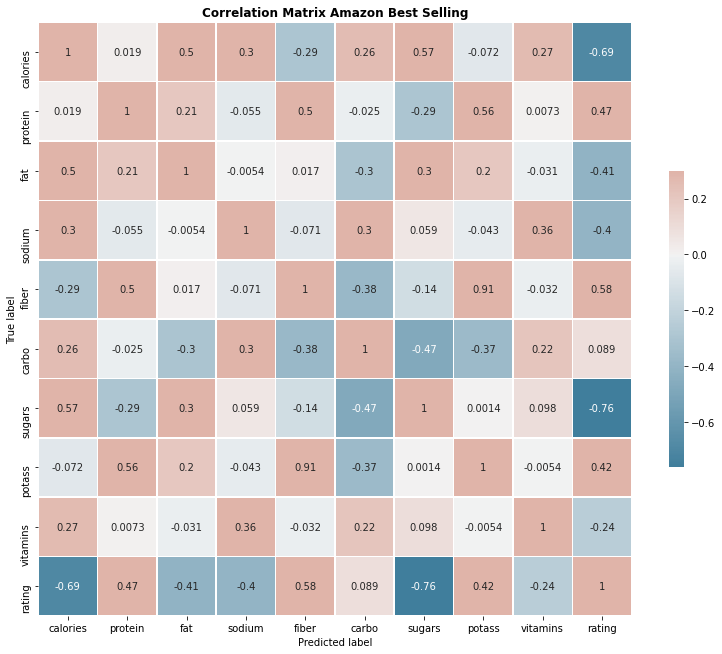

In [43]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(),annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix Cereal Best Selling",fontweight="bold")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Dilihat dari Corelation Mapping diatas dapat disimpulkan bahwa yang mempunyai:

Korelasi positif yaitu kolom "fiber" dan "potass"
Korelasi negatif yaitu "rating dan sugars", "calories dan rating"


**Evaluasi Model**

* **Analisa Top Cereal Name dengan Rating terbanyak**

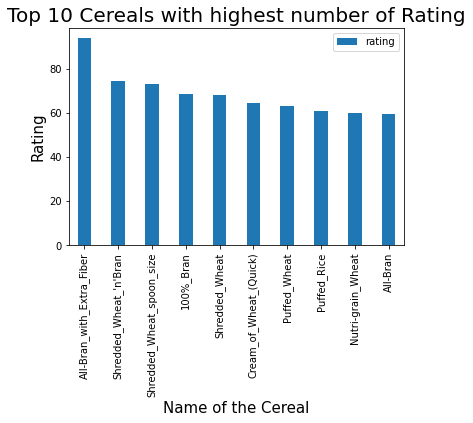

In [30]:
df[["Cereal name","rating"]].nlargest(10,"rating").plot.bar(x="Cereal name",y="rating",width=0.4,)#'vertical', 'horizontal',color=color
plt.title("Top 10 Cereals with highest number of Rating",fontsize=20)
plt.xlabel("Name of the Cereal",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.show()

Berdasarkan grafik diatas kita bisa mengetahui top 10 dari Cereal yang paling banyak mendapat rating oleh penikmat cereal

* **Menganalisa kategori Cereal dengan sodium tertinggi**

In [54]:
df[df.sodium == max(df.sodium)]

,Cereal name,Supplier,Cold or Hot,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
53,Product_19,K,C,100,3,0,320,1.0,20.0,3.0,45.0,100,41.50354


Berdasarkan data diatas dengan nama cerealnya yang memiliki jumlah sodiumnya paling tinggi sebesar 320 bernama Product_19

* **Menganalisa nama cereal dari jumlah kalori terendah** 

In [39]:
df[df.calories == min(df.calories)]

,Cereal name,Supplier,Cold or Hot,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,93.704912
54,Puffed_Rice,Q,C,50,1,0,0,0.0,13.0,0.0,15.0,0,60.756112
55,Puffed_Wheat,Q,C,50,2,0,0,1.0,10.0,0.0,50.0,0,63.005645


Berdasarkan data diatas dengan nama cerealnya yang memiliki jumlah kalori terendah sebesar 50 sebanyak 3 nama cereal yaitu All-Brand_with_Extra_Fiber, Puffed_Rice, Puffed_Wheat

* Melihat Jumlah menyeduh Cereal berdasarkan Dingin atau Panas 

In [41]:
df["Cold or Hot"].value_counts()

C    74
H     3
Name: Cold or Hot, dtype: int64

Dilihat dari hasil diatas jumlah menyeduh dengan cara Cold sebanyak 74 dan menyeduh dengan Hot sebanyak 3

* **Analisa Cereal yang termasuk top 20 dengan Rating tertinggi**

In [42]:
df[["Cereal name","rating","Supplier"]].nlargest(20,"rating")

,Cereal name,rating,Supplier
3,All-Bran_with_Extra_Fiber,93.704912,K
64,Shredded_Wheat_'n'Bran,74.472949,N
65,Shredded_Wheat_spoon_size,72.801787,N
0,100%_Bran,68.402973,N
63,Shredded_Wheat,68.235885,N
20,Cream_of_Wheat_(Quick),64.533816,N
55,Puffed_Wheat,63.005645,Q
54,Puffed_Rice,60.756112,Q
50,Nutri-grain_Wheat,59.642837,K
2,All-Bran,59.425505,K


Hasil data diatas merupakan 20 cereal dengan perolehan rating tertinggi yang mendapatkan perolehan rating tertinggi adalah "Shredded_Wheat_'n'Bran" dengan Supplier N, dan mendapatkan rating 74.472949. 

* **Kesimpulan**

Berdasarkan data yang telah diamati diatas maka dapat disimpulkan:
1. Dari Eksplorasi data diatas maka dataset awalnya memiliki 77 baris, dan 13 kolom. Dari data tersebut memiliki data kosong pada kolom carbo, sugars, dan potass. Tetapi data kosong tersebut dapat dihapus agar tidak memiliki data kosong lagi
2. Dengan pemodelan diatas dapat disimpulkan  bahwa dataset dalam kategori data normal
3. Dari mapping data diatas terjadi korelasi positif dan negatif. Yang mempunyai Korelasi positif yaitu kolom "fiber" dan "potass".
4. Lalu hasil untuk evaluasi data diatas sebagai berikut:


* Cereal dari jumlah kalori terendah dimiliki oleh 3 nama cereal yaitu All-Bran_with_Extra_Fiber, Puffed_Rice, dan Puffed_wheat.
* Jumlah menyeduh Cereal berdasarkan Dingin atau Panas adalah 74 dengan dingin dan hanya 3 dengan panas
* Cereal dengan sodium tertinggi dimiliki cereal dengan nama Product_19
* Cereal Name dengan Rating terbanyak adalah "All-Bran_with_Extra_Fiber" mendapat rating 74
